In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data=df.drop(["caa","thall","slp","oldpeak"],axis=1)
data.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'output'],
      dtype='object')

In [ ]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value

In [4]:
data.loc[data["sex"] == 1, "sex"] = "Male"
data.loc[data["sex"] == 0, "sex"] = "Female"

In [5]:
data.isnull().sum()
data.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,Male,3,145,233,1,0,150,0,1
1,37,Male,2,130,250,0,1,187,0,1
2,41,Female,1,130,204,0,0,172,0,1
3,56,Male,1,120,236,0,1,178,0,1
4,57,Female,0,120,354,0,1,163,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0
299,45,Male,3,110,264,0,1,132,0,0
300,68,Male,0,144,193,1,1,141,0,0
301,57,Male,0,130,131,0,1,115,1,0


In [6]:
dist=data.output.value_counts()
dist

1    165
0    138
Name: output, dtype: int64

# EDA


<AxesSubplot: >

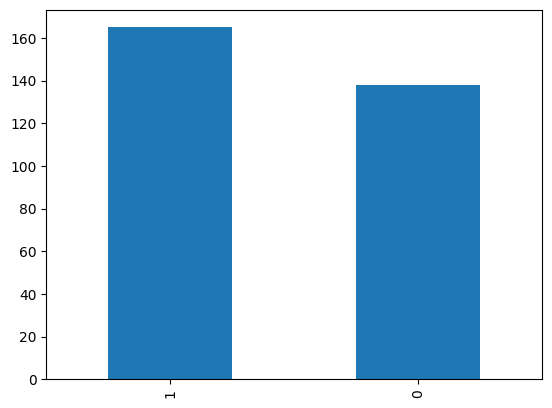

In [7]:
dist.plot(kind="bar")

In [8]:
dist2=data[["sex","output"]].groupby("sex").value_counts()
dist2=pd.DataFrame(dist2)

dist2.rename(columns={0: 'count'}, inplace=True)
dist2=dist2.reset_index()

In [9]:
dist2

,sex,output,count
0,Female,1,72
1,Female,0,24
2,Male,0,114
3,Male,1,93


In [10]:
def per(x):
    return (x["count"]/sum(dist2[dist2["sex"]==x["sex"]]["count"]))*100
    
    
dist2["percentage"]=dist2.apply(per,axis=1)    
    
    

In [11]:
dist2.columns

Index(['sex', 'output', 'count', 'percentage'], dtype='object')

In [12]:
dist2[dist2["output"]==1][["sex","output","percentage"]]

,sex,output,percentage
0,Female,1,75.000000
3,Male,1,44.927536


Text(0.5, 1.0, 'percentage of people suffered in each gender ')

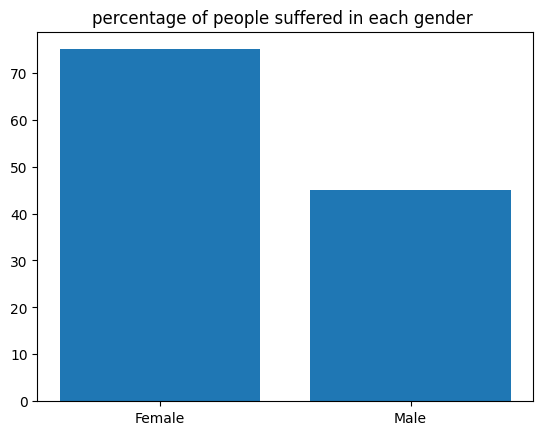

In [13]:
plt.bar(dist2[dist2["output"]==1]["sex"],dist2[dist2["output"]==1]["percentage"])
plt.title("percentage of people suffered in each gender ")

In [14]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,Male,3,145,233,1,0,150,0,1
1,37,Male,2,130,250,0,1,187,0,1
2,41,Female,1,130,204,0,0,172,0,1
3,56,Male,1,120,236,0,1,178,0,1
4,57,Female,0,120,354,0,1,163,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0
299,45,Male,3,110,264,0,1,132,0,0
300,68,Male,0,144,193,1,1,141,0,0
301,57,Male,0,130,131,0,1,115,1,0


In [16]:
data[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng"]]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng
0,63,Male,3,145,233,1,0,150,0
1,37,Male,2,130,250,0,1,187,0
2,41,Female,1,130,204,0,0,172,0
3,56,Male,1,120,236,0,1,178,0
4,57,Female,0,120,354,0,1,163,1
...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1
299,45,Male,3,110,264,0,1,132,0
300,68,Male,0,144,193,1,1,141,0
301,57,Male,0,130,131,0,1,115,1


# MODEL TRAINING

In [22]:
#test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng"]], data["output"], test_size=0.33, random_state=42)


In [23]:
#model selection
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [20]:
data.loc[data["sex"] == "Male", "sex"] = 1
data.loc[data["sex"] == "Female", "sex"] = 0

In [24]:
clf.fit(X_train,y_train)

RandomForestClassifier()

# PREDICTION AND SCORE

In [25]:
y_pred = clf.predict(X_test)

In [26]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.79


In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.82      0.81      0.82        58

    accuracy                           0.79       100
   macro avg       0.78      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

